# Tutorial of  puzzle solver

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JulienNonin/jigsaw-puzzle-solver/blob/master/sandbox.ipynb)

## Introduction
The idea of our project is to implement a puzzle solver which can generate puzzles in a custom way (according to the number of pieces, size, etc) and solve puzzles in different ways (according to different color spaces, different compatibility calculation methods, etc). 
<br>
Our project is inspired by [Pomeranz, D., Shemesh, M., & Ben-Shahar, O. (2011, June). A fully automated greedy square jigsaw puzzle solver. In CVPR 2011 (pp. 9-16). IEEE](https://www.cs.bgu.ac.il/~ben-shahar/Publications/2011-Pomeranz_Shemesh_and_Ben_Shahar-A_Fully_Automated_Greedy_Square_Jigsaw_Puzzle_Solver.pdf)

## Demonstrate
The following will demonstrate the main function of puzzle solver:

At first, we import all packages we need.

In [31]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from jigsolver.puzzle import *
from jigsolver.metrics import *
from jigsolver.pomeranz_solver.placer import *
from jigsolver.pomeranz_solver.segmenter import *
from copy import copy, deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Modelisation of a Piece

Here we created a piece with 3x3 pixels, we can get Top border of the piece and Bottom border of the piece easily. The main idea of the puzzle solver is based on comparing the compatibility between pieces.

Text(0.5, 1.0, 'Bottom border of the piece')

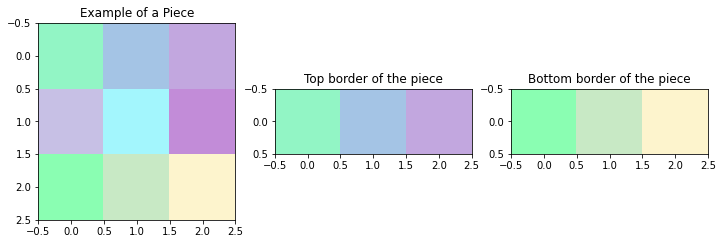

In [32]:
np.random.seed(1)
P=Piece(np.random.randint(255,size=(3,3,3)))
Q=Piece(np.random.randint(255,size=(3,3,3)))

plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
plt.imshow(P.picture,alpha=0.5)
plt.title('Example of a Piece')

plt.subplot(1,3,2)
plt.imshow([P.get_border(Border.TOP)],alpha=0.5)
plt.title('Top border of the piece')

plt.subplot(1,3,3)
plt.imshow([P.get_border(Border.BOTTOM)],alpha=0.5)
plt.title('Bottom border of the piece')

<hr/>

### Modelisation of a puzzle

In this part, we input a example image and create the puzzle by create_from_img, then we cut the image to a new puzzle which still keeps its original arrangement.

In [33]:
img_folder = 'img/'
img = plt.imread(img_folder + "eiffel.jpg")

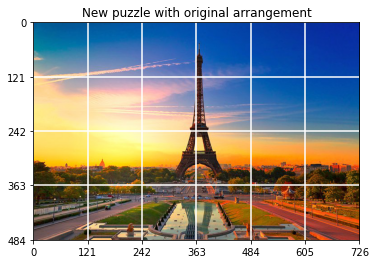

In [34]:
eiffel_puzzle = Puzzle()
eiffel_puzzle.create_from_img(img,nb_pieces=24)
plt.title('New puzzle with original arrangement')
eiffel_puzzle.display()


### Prepare to play

To let this puzzle ready to play, we need to shuffle it. But we can keep the original puzzle as the correct result to check whether puzzle solver's result is correct. <br>

After shuffled, all pieces will be collect in bag_of_pieces and the board will be empty. Then we can place the piece in to board. 

The following example show that we placed the first and second piece into the empty/unsolved board.

In [35]:
eiffel_unsolved = copy(eiffel_puzzle)
eiffel_unsolved.shuffle()

In [36]:
some_piece = eiffel_unsolved.bag_of_pieces[0]
eiffel_unsolved.board[3,2] = some_piece
some_piece = eiffel_unsolved.bag_of_pieces[1]
eiffel_unsolved.board[2,2] = some_piece

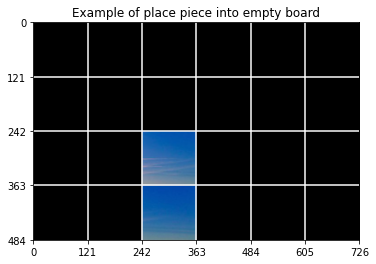

In [37]:
plt.title('Example of place piece into empty board')
eiffel_unsolved.display()

> To prepare to place in right way, we need to find the neighbors of piece in board. 
<br><br>
We can find the result of the neighbors for piece in position (3,2). 
<br><br>
We use 0,1,2,3 to mark the neighbors in the up, right, bottom, left side of itself. 
<br><br>
It returned to slot beside its right and left and one piece up to itself.


In [29]:
for slot in eiffel_unsolved.board.neighbors(3,2):
    print(slot)

(0, <jigsolver.puzzle.Piece object at 0x7fa0533dcf10>)
(1, <jigsolver.puzzle.Slot object at 0x7fa052dd2550>)
(3, <jigsolver.puzzle.Slot object at 0x7fa053a749d0>)


## Placer

Now, let's see how the puzzle solver place the pieces into board. We just create the puzzle and shuffle it as before.

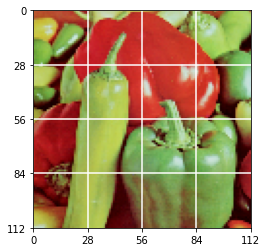

In [38]:
img = 255 * plt.imread("img/peppers.png")[:,:,:3]
#img = plt.imread("img/eiffel.jpg")
puzzle = Puzzle(patch_size=28)
puzzle.create_from_img(img)
puzzle.display()
puzzle.shuffle()

We compute the compatibility matrix in the paper of [Pomeranz, D., Shemesh, M., & Ben-Shahar, O. (2011, June). A fully automated greedy square jigsaw puzzle solver. In CVPR 2011 (pp. 9-16). IEEE](https://www.cs.bgu.ac.il/~ben-shahar/Publications/2011-Pomeranz_Shemesh_and_Ben_Shahar-A_Fully_Automated_Greedy_Square_Jigsaw_Puzzle_Solver.pdf) <br><br>
The compatibility matrix has the compatibility value of each piece with others. For example, if there totally 100 pieces the shape of the matrix should be 100x100. In this case, the compute of the compatibility matrix will take some times when the puzzle is big.


In [10]:
CM = pomeranz_CM(puzzle)

To place the piece, the puzzle solver just choose the first piece randomly and place it randomly, then compare all border which can near the piece placed with all others, then place the best one, which have best compatibility, to the slot. <br>And do it again and again until the board is full. <br>
We call this method as greedy_placer.

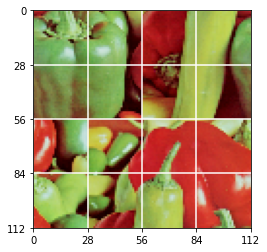

In [11]:
puzzle.clean()
naiv_greedy_placer(puzzle, CM, display=False)
puzzle.display()

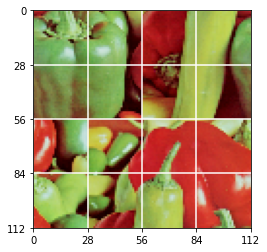

In [12]:
# Improved version of the placer
puzzle.clean()
greedy_placer(puzzle, CM, rolling=False)
puzzle.display()

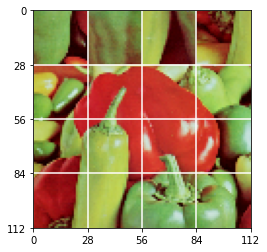

In [13]:
# New version of the placer with the rolling behaviour
puzzle.clean()
greedy_placer(puzzle, CM, rolling=True)
puzzle.display()

## Segmenter

After the board is full, the puzzle solver will reuse the compatibility matrix to find the BestBuddies and just keep the best segmenter in board.

In [14]:
BB = BestBuddies_matrix(CM)

In [15]:
segment = segmenter(puzzle,BB)

In [16]:
remove_all_but_segment(puzzle,segment)

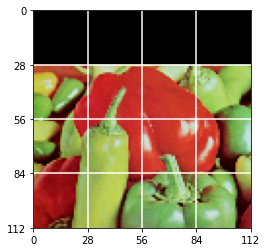

In [17]:
puzzle.display()